### Aggregation methods
- Majority Voting
- Bagging
- Random Forests

##### 1. Majority Voting(다수결)
- hot voting : 단순 투표
- soft voting : 가중치 투표

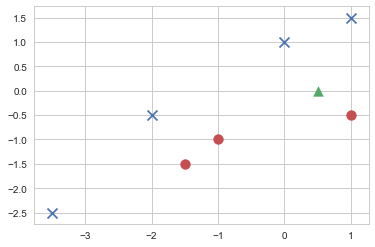

In [16]:
%matplotlib inline
x = np.array([[-1,-1],[-1.5,-1.5],[1,-0.5],[-3.5,-2.5],[0,1],[1,1.5],[-2,-0.5]])
y = np.array([1,1,1,2,2,2,2])

plt.scatter(x[y==1,0], x[y==1,1], s=100, marker='o', c='r')
plt.scatter(x[y==2,0], x[y==2,1], s=100, marker='x', c='b')

x_new = [0.5, 0]

plt.scatter(x_new[0], x_new[1], s=100, marker='^',c='g')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

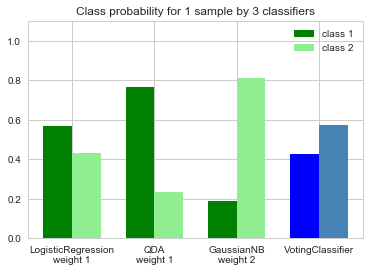

In [18]:
model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr',model1),('qda',model2),('gnb',model3)],
                           voting='soft', weights=[1,1,2])

probs = [c.fit(x,y).predict_proba([x_new]) for c in (model1,model2,model3,ensemble)]
class1 = [pr[0,0] for pr in probs]
class2 = [pr[0,1] for pr in probs]

ind = np.arange(4)
width = 0.35 # bar width
p1 = plt.bar(ind, np.hstack([class1[:-1], [0]]), width, color='green', label='class 1')
p2 = plt.bar(ind + width, np.hstack([class2[:-1], [0]]), width, color='lightgreen', label='class 2')
p3 = plt.bar(ind, [0,0,0,class1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0,0,0,class2[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['LogisticRegression\nweight 1',
                              'QDA\nweight 1',
                              'GaussianNB\nweight 2',
                              'VotingClassifier'])
plt.ylim([0,1.1])
plt.title("Class probability for 1 sample by 3 classifiers")
plt.legend()
plt.show()

hot voting 방식이었다면 class1 선택이겠지만,

soft voting 방식에 weight를 GaussianNB에 2를 주어 class2 선택

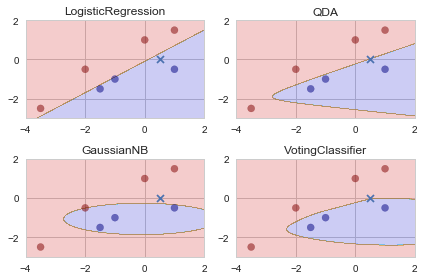

In [19]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005), np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['LogisticRegression', 'QDA', 'GaussianNB', 'VotingClassifier']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()    
plt.show()

#### Ensemble을 사용한 성능 향상
- 다수결 모형이 개별모형보다 더 나은 성능을 보인다

In [1]:
def total_error(p,N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N+1):
        te += sp.misc.comb(N, k) * p**k * (1-p)**(N-k)
    return te

다수결 모형의 성능을 total_error로..?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  after removing the cwd from sys.path.


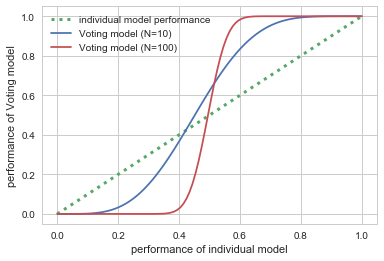

In [2]:
x = np.linspace(0,1,100)
plt.plot(x,x,'g:',lw=3, label="individual model performance")
plt.plot(x,total_error(x,10), 'b-', label="Voting model (N=10)")
plt.plot(x,total_error(x,100), 'r-', label="Voting model (N=100)")
plt.xlabel("performance of individual model")
plt.ylabel("performance of Voting model")
plt.legend()
plt.show()

개별모형의 성능이 0.5를 넘으면 결합모형의 성능이 개별모형의 성능을 뛰어 넘는다.

##### 2. 배깅(Bagging)
- 다수결에서는 독립적인 모형의 수가 많을수록 성능 향상이 일어날 가능성이 높다.
- but 각각 다른 모형을 사용하는데에 한계가 있다.
- 같은 확률모형을 쓰지만 서로 다른 결과를 출력하도록 하는 다수의 모형을 만든다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
x,y = iris.data[:,[0,2]], iris.target

In [4]:
model1 = DecisionTreeClassifier().fit(x,y)
model2 = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features=True, random_state=0).fit(x,y)

차원 중복사용 설정(bootstrap_features=True)

데이터중복사용 설정(bootstrap=True: 디폴트)

성능평가시 OOB(out-of-bag)샘플 미사용(디폴트 False)

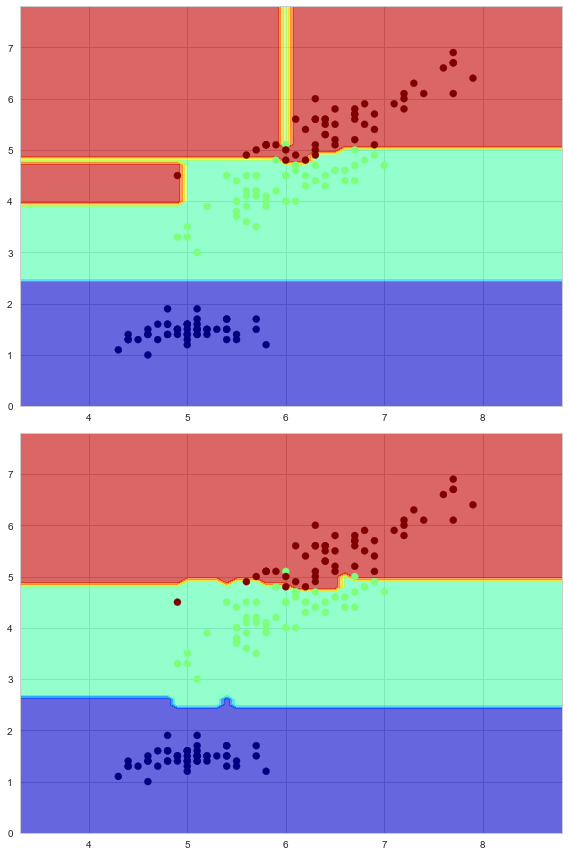

In [7]:
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(8,12))

plt.subplot(211)
z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(x[:,0], x[:,1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.subplot(212)
z2 = model2.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(x[:,0], x[:,1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.tight_layout()
plt.show()

- decision tree 모형 하나의 predict결과를 보면 overfitting된 걸 볼 수 있다.
- 반면,bagging으로 모형결합을 한 결과 overfitting의 정도가 거의 없다고 볼 수 있다.

##### 3. 랜덤 포레스트(Random Forest)

In [8]:
from sklearn import clone
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

ExtraTreeClassifier는 Extremely Randomized Trees로 모든 노드에서 random하게 독립변수를 선택한다.(극단적 랜덤 포레스트)

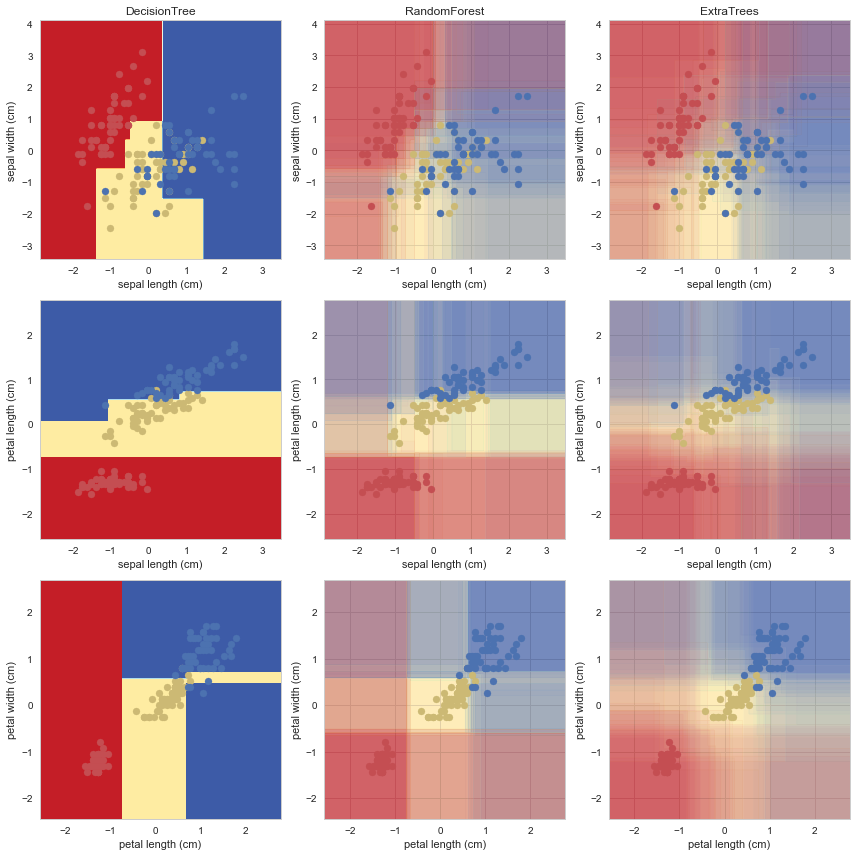

In [23]:
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02
seed = 13

models = [DecisionTreeClassifier(max_depth=4),
          RandomForestClassifier(max_depth=4, n_estimators=n_estimators),
          ExtraTreesClassifier(max_depth=4, n_estimators=n_estimators)]

plot_idx = 1
plt.figure(figsize=(12, 12))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(seed)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        clf = clone(model)
        clf = model.fit(X, y)

        plt.subplot(3, 3, plot_idx)
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        if plot_idx <= len(models):
            plt.title(model_title)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c,
                        label=iris.target_names[i], cmap=cmap)
            plt.xlabel(iris.feature_names[pair[0]])
            plt.ylabel(iris.feature_names[pair[1]])
        plot_idx += 1

plt.tight_layout()
plt.show()

##### 랜덤 포레스트는 각 독립변수의 중요도를 알 수 있다.(계산 가능)

In [24]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [25]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)
forest = ExtraTreesClassifier(n_estimators=250, random_state=0).fit(x,y)

In [27]:
forest.estimators_

[ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=209652396,
           splitter='random'),
 ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=398764591,
           splitter='random'),
 ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=924231285,
           splitt

In [28]:
forest.feature_importances_

array([ 0.17763201,  0.29590176,  0.20835127,  0.04712087,  0.04461413,
        0.04391181,  0.04630262,  0.04557492,  0.04601349,  0.04457711])

결합모형(랜덤포레스트) 뿐만아니라 개별 모형에 대해서도 독립변수 중요도를 구할 수 있다.

feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


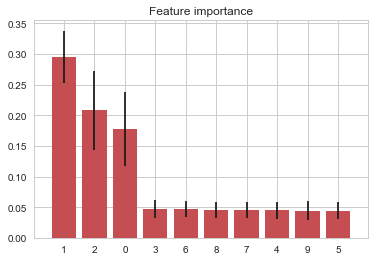

In [34]:
importance = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

print("feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f+1, indices[f], importance[indices[f]]))
plt.title("Feature importance")
plt.bar(range(x.shape[1]), importance[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x.shape[1]), indices)
plt.xlim(-1, x.shape[1])
plt.show()

##### 변수의 중요도 예제 : olivetti faces 

In [35]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

face = fetch_olivetti_faces()
x = face.data
y = face.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Juno\scikit_learn_data


In [54]:
x.shape

(400, 4096)

In [49]:
face.images.shape

(400, 64, 64)

- image가 총 400개
- image하나가 64X64 pixel로 되어있음

In [47]:
set(y)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39}

In [41]:
print(face.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [51]:
forest = ExtraTreesClassifier(n_estimators=1000, random_state=0).fit(x,y)

In [56]:
importances = forest.feature_importances_
importances = importances.reshape(face.images[0].shape)

In [55]:
face.images[0].shape

(64, 64)

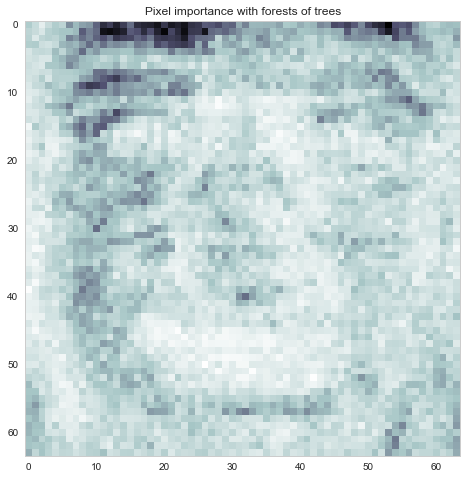

In [57]:
plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("Pixel importance with forests of trees")
plt.show()

##### plt.imshow() : 이미지를 plot으로 보여줌
```
Signature: 
plt.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
```
**Docstring:
Display an image on the axes.